# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [248]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
mpl.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('./../assets/billboard.csv')

df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [249]:
print ("This data contains a list of songs in the billboard top 100 and their by week ranking for the year 2000 along with their details (artist, title, genre, time length, etc.). The weeks are listed out by columns and the artists only appear once per row. This makes it difficult to perform analysis on so I imagine I will have to melt/transpose this data. Also - the time, date entered, and date peaked columns are not a date/time field so I will have to turn those into date/time in order to use them in analysis. The data The average first week ranking is 80 with the best 1st week ranking being 15.")
print df.describe()
print df.dtypes
print df.genre.value_counts()



This data contains a list of songs in the billboard top 100 and their by week ranking for the year 2000 along with their details (artist, title, genre, time length, etc.). The weeks are listed out by columns and the artists only appear once per row. This makes it difficult to perform analysis on so I imagine I will have to melt/transpose this data. Also - the time, date entered, and date peaked columns are not a date/time field so I will have to turn those into date/time in order to use them in analysis. The data The average first week ranking is 80 with the best 1st week ranking being 15.
         year   x1st.week   x2nd.week   x3rd.week   x4th.week   x5th.week  \
count   317.0  317.000000  312.000000  307.000000  300.000000  292.000000   
mean   2000.0   79.958991   71.173077   65.045603   59.763333   56.339041   
std       0.0   14.686865   18.200443   20.752302   22.324619   23.780022   
min    2000.0   15.000000    8.000000    6.000000    5.000000    2.000000   
25%    2000.0   74

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [250]:
# get rid of dots and x in the columns
df.columns = ['year', 'artist', 'track', 'time', 'genre', 'date_entered', 'date_peaked', '1th_week', '2th_week',
       '3th_week', '4th_week', '5th_week', '6th_week', '7th_week', '8th_week', '9th_week', '10th_week', 
       '11th_week', '12th_week', '13th_week', '14th_week', '15th_week', '16th_week', '17th_week', '18th_week',
       '19th_week', '20th_week', '21th_week', '22th_week', '23th_week', '24th_week', '25th_week', '26th_week',
       '27th_week', '28th_week', '29th_week', '30th_week', '31th_week', '32th_week', '33th_week', '34th_week',
       '35th_week', '36th_week', '37th_week', '38th_week', '39th_week', '40th_week', '41th_week', '42th_week',
       '43th_week', '44th_week', '45th_week', '46th_week', '47th_week', '48th_week', '49th_week', '50th_week',
       '51th_week', '52th_week', '53th_week', '54th_week', '55th_week', '56th_week', '57th_week', '58th_week',
       '59th_week', '60th_week', '61th_week', '62th_week', '63th_week', '64th_week', '65th_week', '66th_week',
       '67th_week', '68th_week', '69th_week', '70th_week', '71th_week', '72th_week', '73th_week', '74th_week',
       '75th_week', '76th_week']
#Change 1st week type to float
df['1th_week'] = df['1th_week'].astype(float)
#Change track to string
df['track'] = df['track'].astype('str') 
#Changing dates to date_time_field
df['date_entered'] = pd.to_datetime(df['date_entered'],format="%Y-%m-%d")
df['date_peaked'] = pd.to_datetime(df['date_peaked'],format="%Y-%m-%d")

#Finding all null values
#drop all null values for each column
#df.dropna(axis = 1, how = 'all', inplace = True)

df.dtypes
#df.head()


year                     int64
artist                  object
track                   object
time                    object
genre                   object
date_entered    datetime64[ns]
date_peaked     datetime64[ns]
1th_week               float64
2th_week               float64
3th_week               float64
4th_week               float64
5th_week               float64
6th_week               float64
7th_week               float64
8th_week               float64
9th_week               float64
10th_week              float64
11th_week              float64
12th_week              float64
13th_week              float64
14th_week              float64
15th_week              float64
16th_week              float64
17th_week              float64
18th_week              float64
19th_week              float64
20th_week              float64
21th_week              float64
22th_week              float64
23th_week              float64
                     ...      
47th_week              float64
48th_wee

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [257]:
mdf = pd.melt(df, id_vars = df.ix[:,:'date_peaked'].columns.values, var_name = "Week", value_name = 'Ranking')
#changing week column to integer for analysis/plotting purposes
mdf['Week'] = mdf.Week.str.replace('th_week','')
mdf['Week'] = mdf.Week.astype(int)
mdf.head()


,year,artist,track,time,genre,date_entered,date_peaked,Week,Ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

             track
genre             
Rock         10412
Country       5624
Rap           4408
R&B           1748
Latin          684
Pop            684
Electronica    304
Gospel          76
Jazz            76
Reggae          76


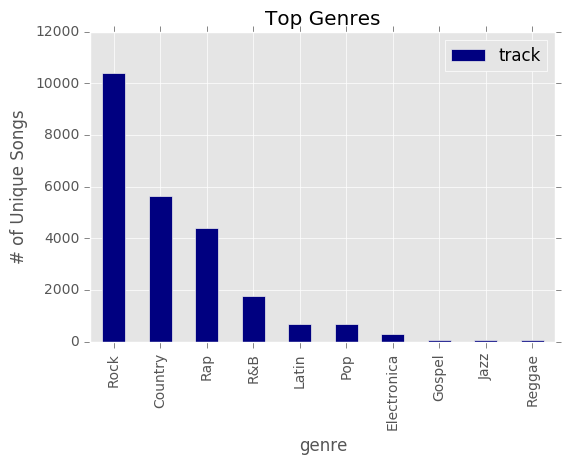

In [258]:
pivotb = pd.pivot_table(mdf, index = ['genre'], values = ['track'], aggfunc = 'count', fill_value = 0).sort_values('track', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

print pivotb

pivotb.plot(kind='bar',title = 'Top Genres',colormap='jet').set_ylabel("# of Unique Songs")

plt.show()


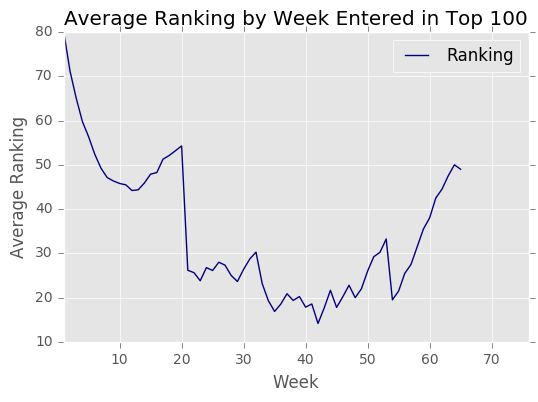

In [260]:
pivotl = pd.pivot_table(mdf, index = ['Week'], values = ['Ranking'], aggfunc = 'mean')

pivotl.plot(kind='line',title = 'Average Ranking by Week Entered in Top 100',colormap='jet').set_ylabel("Average Ranking")

plt.show()


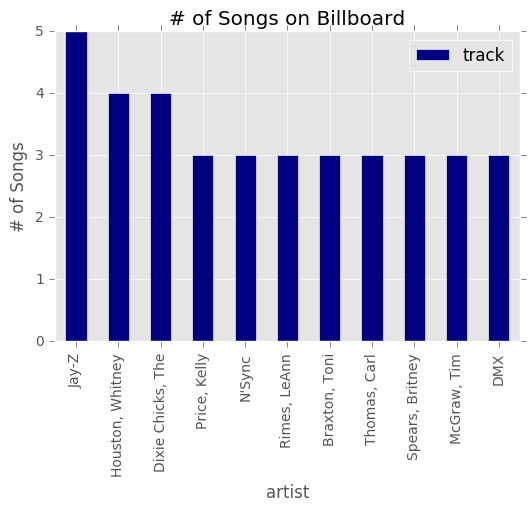

In [145]:
pivotl = pd.pivot_table(df, index = ['artist'], values = ['track'], aggfunc = 'count', fill_value = 0).sort_values('track', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[0:11]

pivotl.plot(kind='bar',title = '# of Songs on Billboard',colormap='jet').set_ylabel("# of Songs")

plt.show()


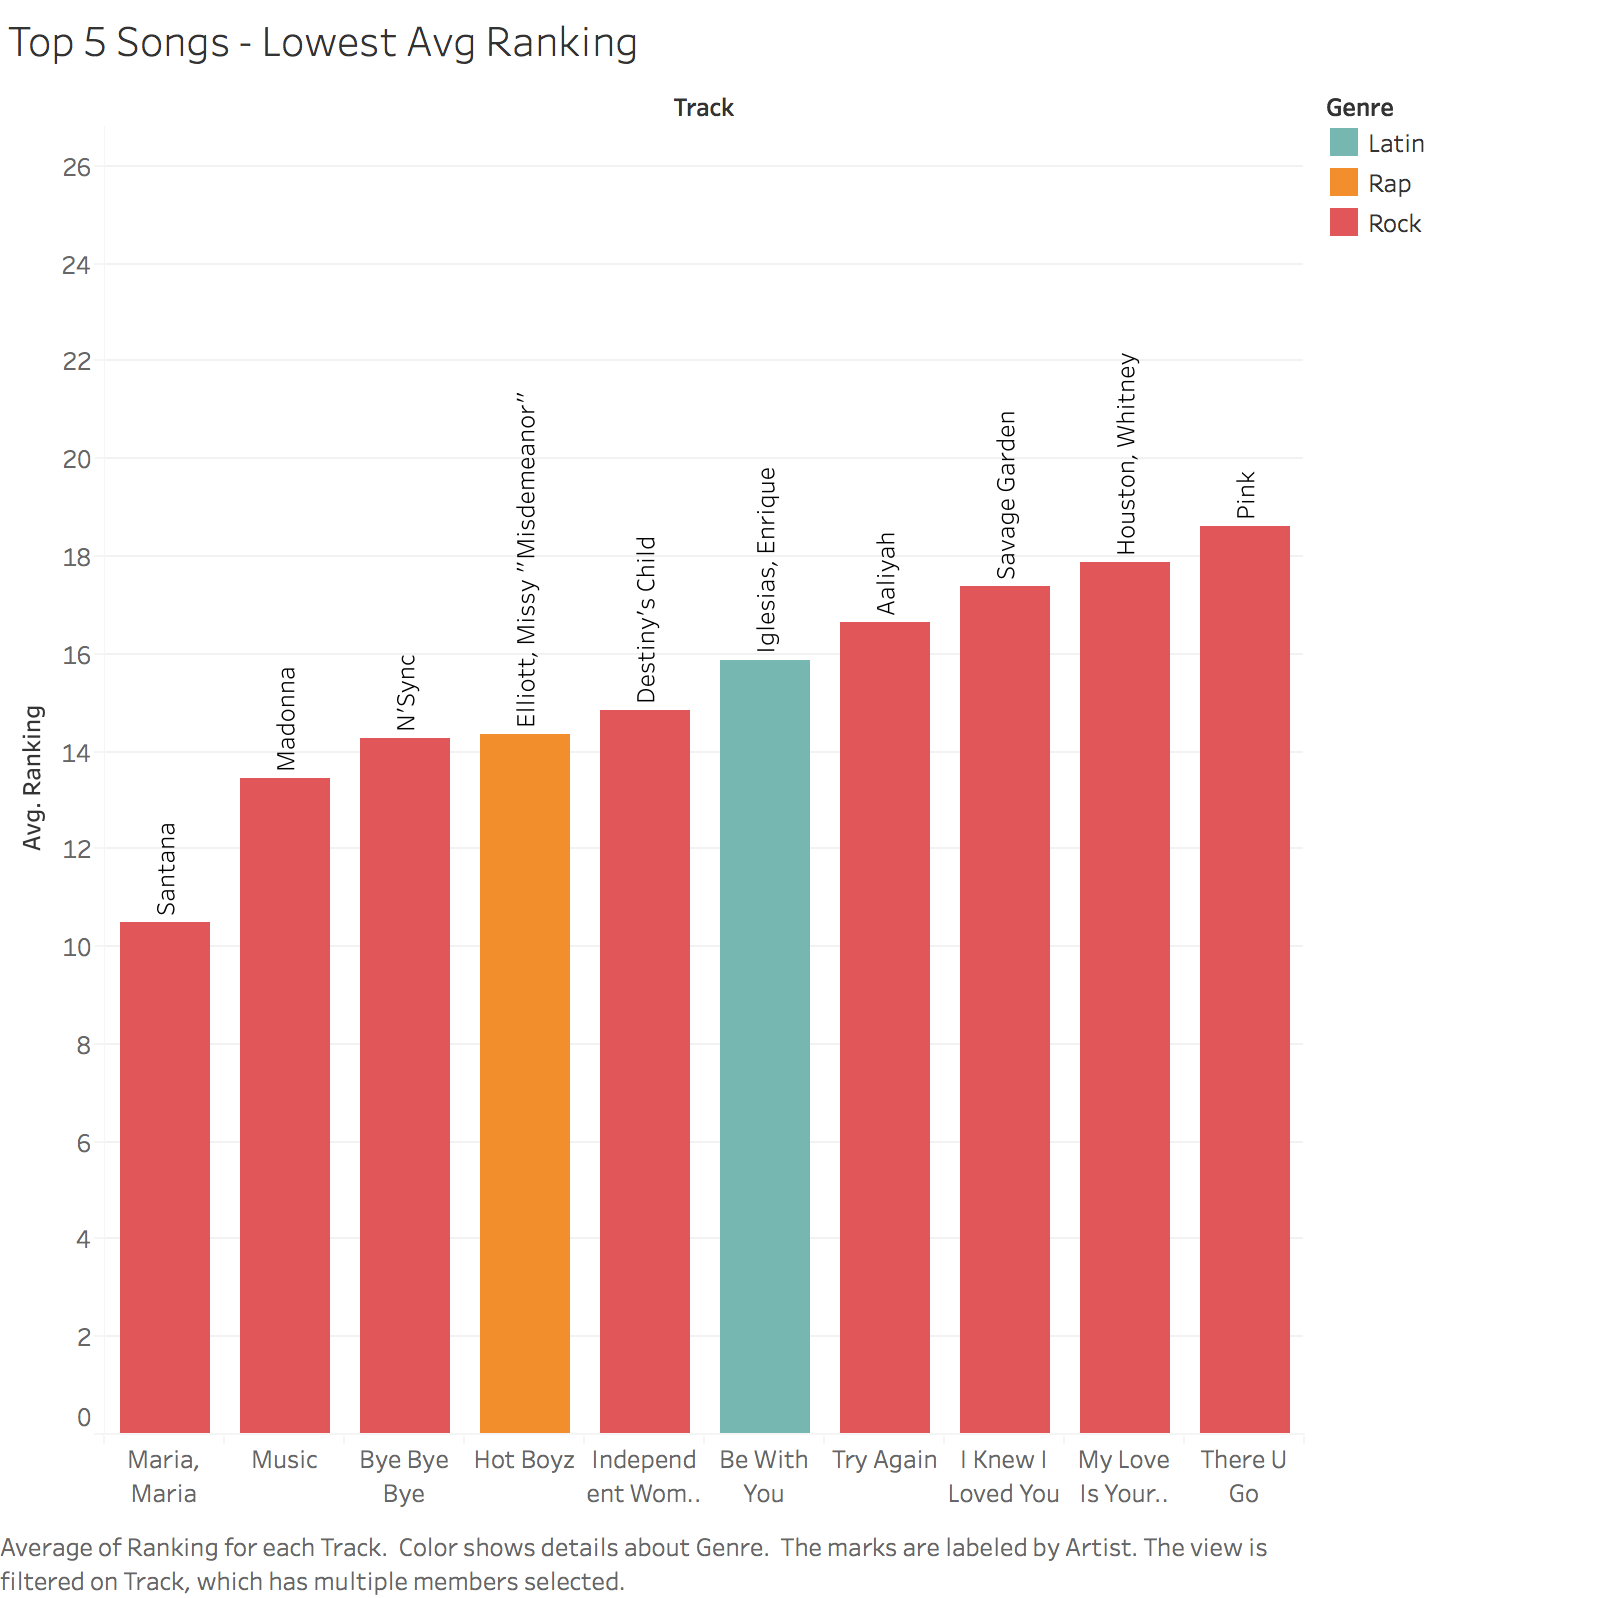

In [224]:
#Exporting melted data to CSV for Tableau
mdf.to_csv(path_or_buf=('/Users/Madballa55/dsi-gitbook/dsi/projects/dsi-sea-project02/assets/melted_data.csv'))
Image(filename='./../assets/Tableau_Image_2.png')

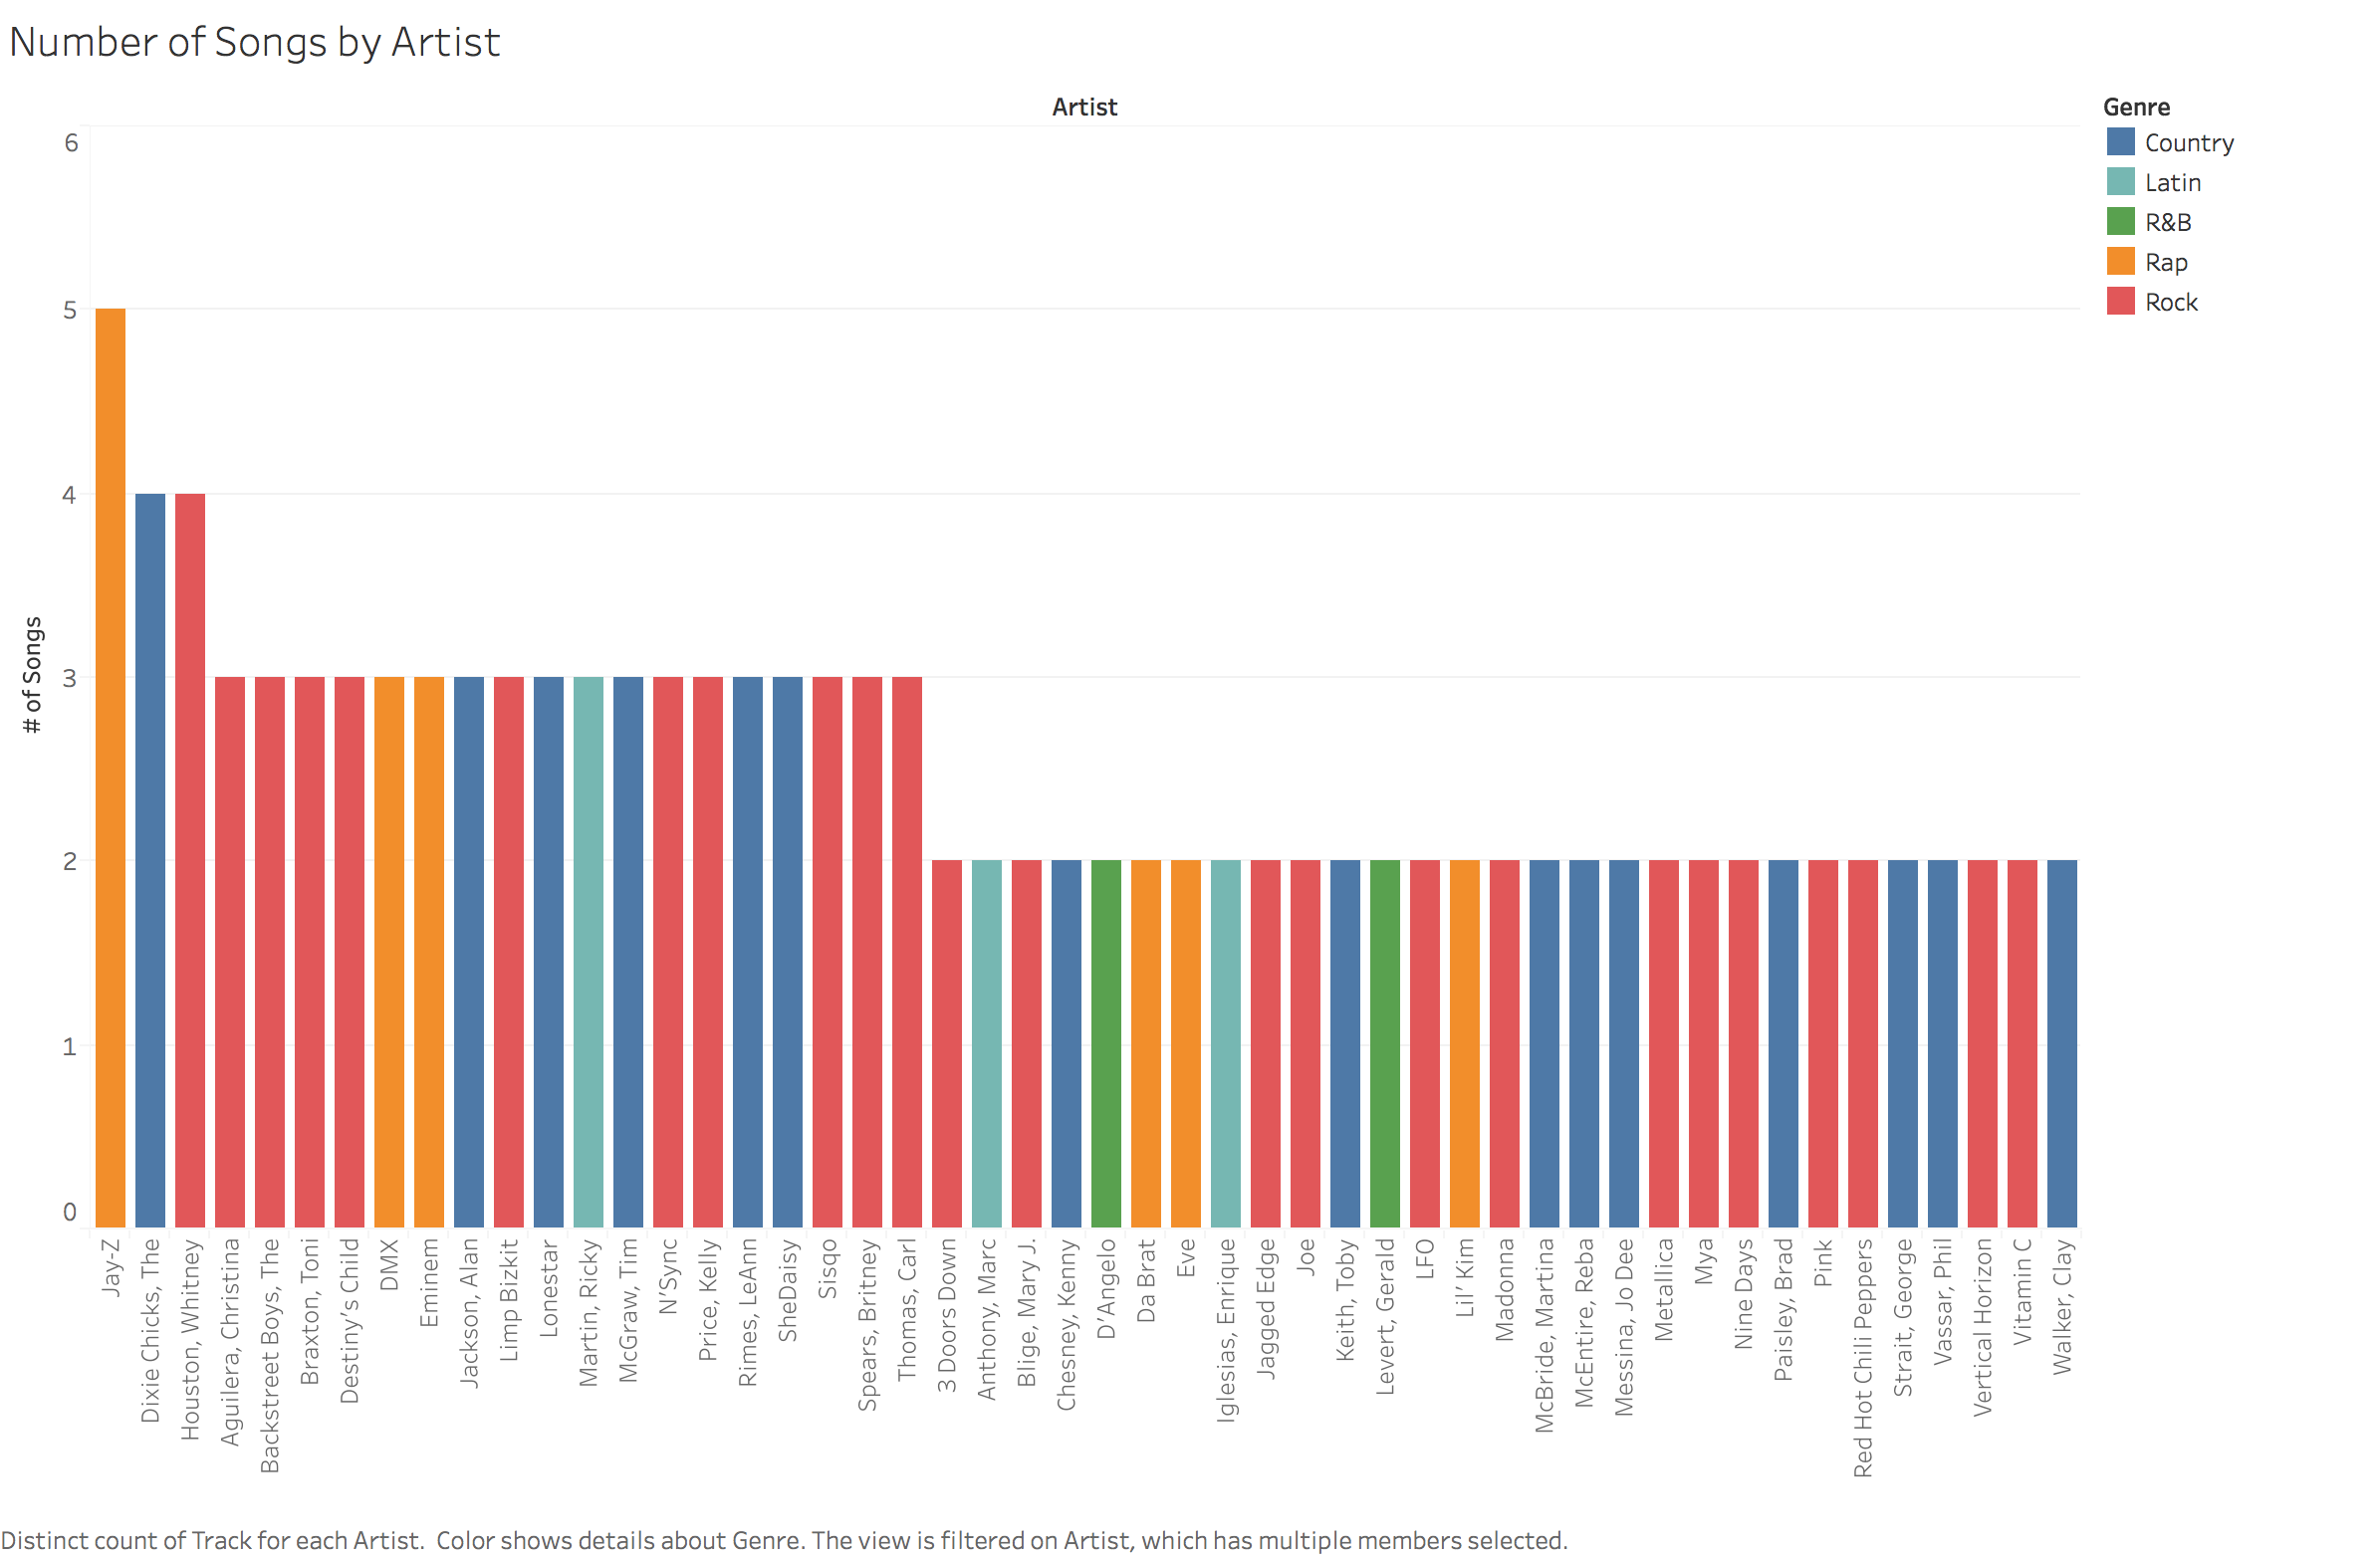

In [151]:
Image(filename='./../assets/Tableau_Image_1.png')


## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [ ]:
# If I was a music label - what types of songs should I be investing in and when? 
# By knowing this we can help direct capital investment into songs that have these characteristics to increase our return on investment by creating more top 100 hits.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

In [ ]:
'''1) Create a new columnin the the melded dataframe that is the difference between date entered and date peaked.

   2) Pivot the data in Tableau to figure out:
        a. Avg ranking & Avg # of Weeks in top 100
        b. Total # of songs in top 100
        b. Split out by Genre, Month, and days taken to peak.

   3) Create visulations that clearly & simply outline each of these results.
   
   4) Provide executive summary and recommendation on findings from the data analysis.

    '''

In [222]:
# Create a new columnin the the melded dataframe that is the difference between date entered and date peaked.
mdf['Days_to_Peak'] = mdf['date_peaked'] - mdf['date_entered']
#Converting into an intenger
mdf['Days_to_Peak'] = (mdf['Days_to_Peak'] / np.timedelta64(1, 'D')).astype(float)
mdf.head()

,year,artist,track,time,genre,date_entered,date_peaked,Week,Ranking,Days_to_Peak
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,56.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,56.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,98.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,35.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,70.0


'3) Create visulations that clearly & simply outline each of these results.'

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [ ]:
'''Blog URL: https://www.tumblr.com/blog/mattbrownblog'''

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 